In [1]:
import base64
import collections
import copy
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import shutil
import sys
import time

import cv2
import Image
import keras
from keras import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL as pil
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import tensorflow as tf

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/lo

In [19]:
data_dir = '/media/ntfs/data/carvana_masking'

input_dir = data_dir + '/input'
tmp_dir = data_dir + '/tmp'
output_dir = data_dir + '/output'

train_dir = input_dir + '/train'
train_mask_dir = input_dir + '/train_masks'
test_dir = input_dir + '/test'

# Some Examples

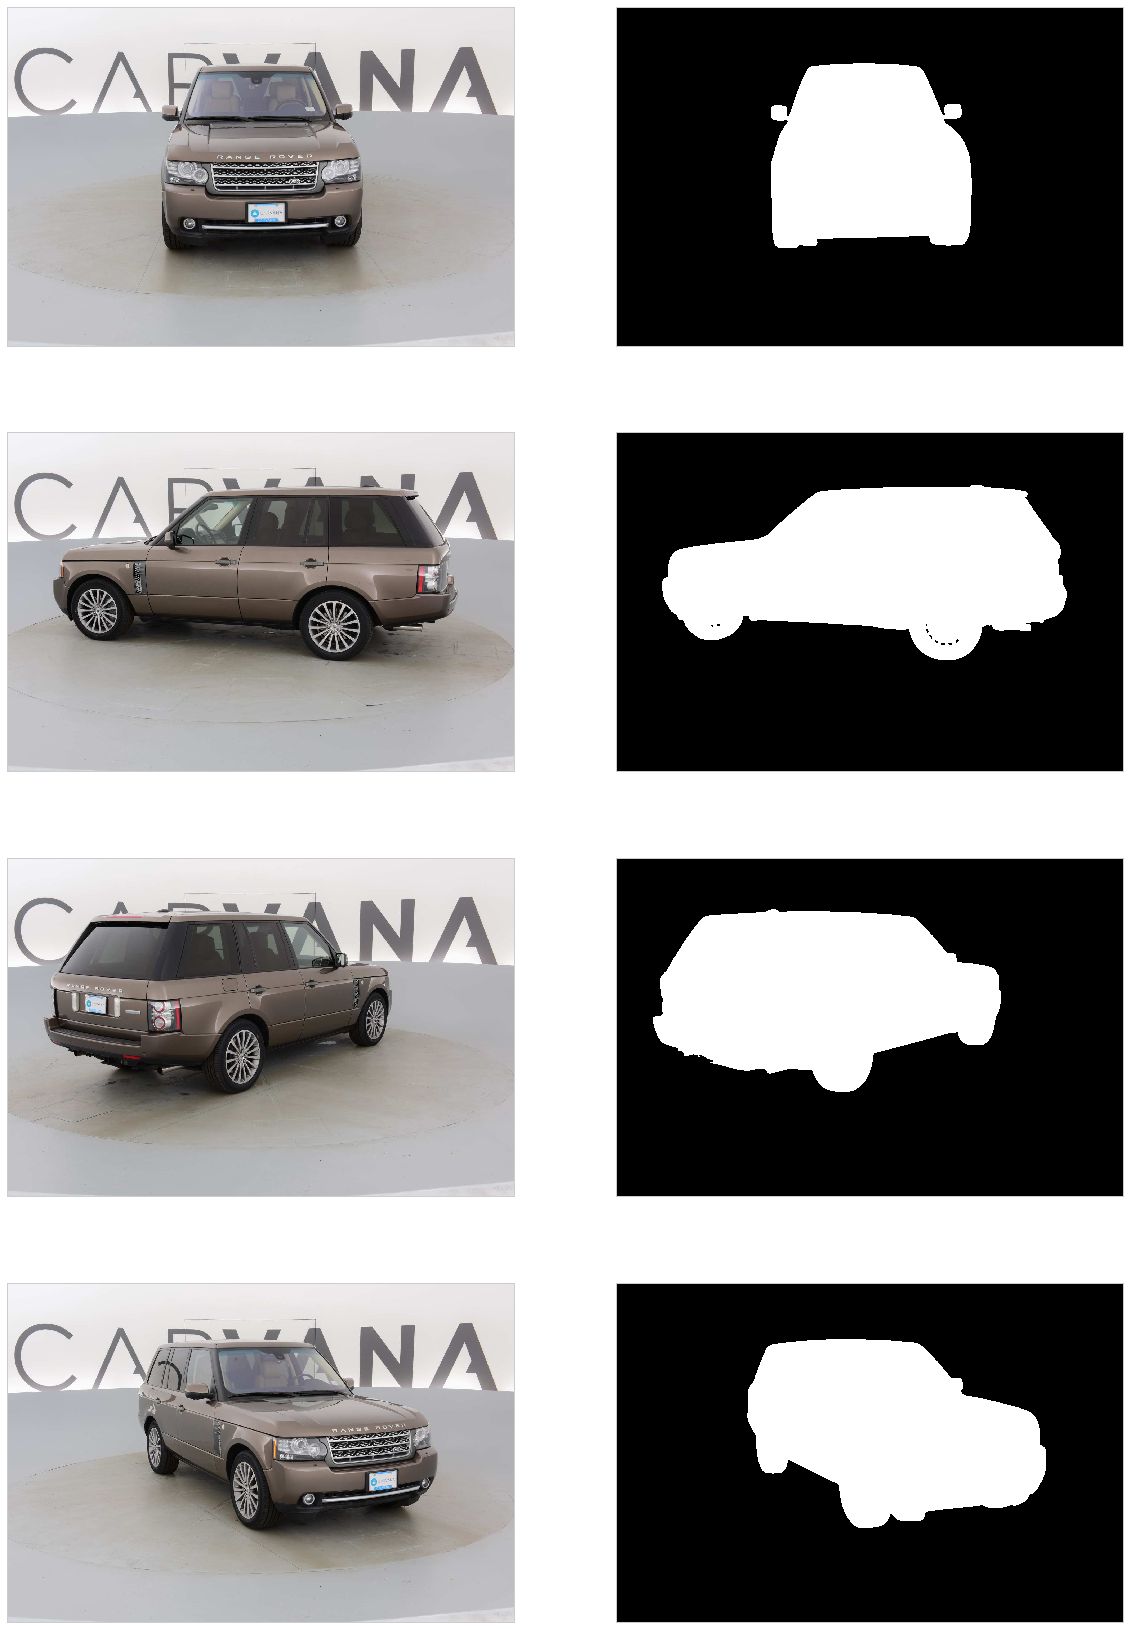

In [26]:
id = 'fff9b3a5373f'
angles = range(1, 17, 5)
n_angles = len(angles)

plt.figure(figsize=(20, 30))

for i in range(n_angles):
    
    img = image.load_img(train_dir + '/{0}_{1:02d}.jpg'.format(id, angles[i]))
    
    plt.subplot(n_angles, 2, 2*i + 1)
    ax = plt.imshow(img)
    plt.grid(None)
    _ = ax.axes.xaxis.set_ticks([])
    _ = ax.axes.yaxis.set_ticks([])
    
    img = image.load_img(train_mask_dir + '/{0}_{1:02d}_mask.gif'.format(id, angles[i]))
    
    plt.subplot(n_angles, 2, 2*i + 2)
    ax = plt.imshow(img)
    plt.grid(None)
    _ = ax.axes.xaxis.set_ticks([])
    _ = ax.axes.yaxis.set_ticks([])